# Explore here

# APIs

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


## Obtenemos los datos de la API

In [3]:
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)



## Buscamos las 10 canciones más populares

In [4]:
results = spotify.artist_top_tracks('spotify:artist:0k17h0D3J5VfsdmQ1iZtE9')
for track in results['tracks'][:10]:
    milisegundos = track['duration_ms']
    total_segundos = milisegundos // 1000
    minutos = total_segundos // 60
    segundos = total_segundos % 60
    print(f"track: {track['name']}")
    print(f"popularity: {track['popularity']}")
    print(f"{minutos}:{segundos:02d}")
    print()

track: Another Brick in the Wall, Pt. 2
popularity: 84
3:58

track: Wish You Were Here
popularity: 84
5:34

track: Comfortably Numb
popularity: 82
6:22

track: Breathe (In the Air)
popularity: 80
2:49

track: Time
popularity: 78
6:53

track: Money
popularity: 78
6:22

track: The Great Gig in the Sky
popularity: 77
4:43

track: Hey You
popularity: 76
4:38

track: Have a Cigar
popularity: 75
5:07

track: Young Lust
popularity: 75
3:29



## Guardamos los datos en un DataFrame

In [5]:
results = spotify.artist_top_tracks('spotify:artist:0k17h0D3J5VfsdmQ1iZtE9')
data=[]
for track in results['tracks'][:10]:
    data.append({'track': track['name'],
           'popularity': track['popularity'],
           'duration-ms': track['duration_ms']
           })
data
df_tracks=pd.DataFrame(data)
df_tracks

,track,popularity,duration-ms
0,"Another Brick in the Wall, Pt. 2",84,238746
1,Wish You Were Here,84,334743
2,Comfortably Numb,82,382296
3,Breathe (In the Air),80,169534
4,Time,78,413947
5,Money,78,382834
6,The Great Gig in the Sky,77,283872
7,Hey You,76,278440
8,Have a Cigar,75,307733
9,Young Lust,75,209956


## Análisis de los datos obtenidos

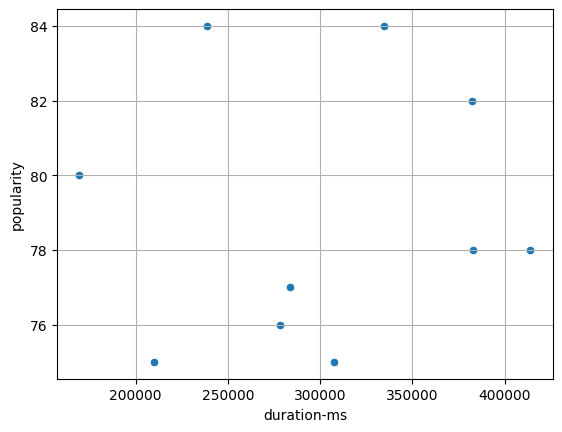

In [6]:
sns.scatterplot(df_tracks,x='duration-ms',y='popularity')
plt.grid()
plt.show()

## Conclusiones:
### No puedo afirmar que haya una relación directa entre popularidad y duración. Si observamos la gráfica, la canción más popular y una de las menos populares tienen casi la misma duración, esto arroja a priori que la popularidad del grupo tiene que ver con algo que va más alla que el tiempo que dura la canción